In [246]:
from pdastro import pdastrostatsclass
import re
phot = pdastrostatsclass()
import numpy as np
#d2d is calculated when gaia is matched to the objects, and is the distance 
# between the objects and their matched gaia positions. Give a rough upper limit on 
# what a good match should fall into
d2d_max = 0.5
dmag_max = 0.1


good matched objects: 680


<AxesSubplot:xlabel='y', ylabel='dy'>

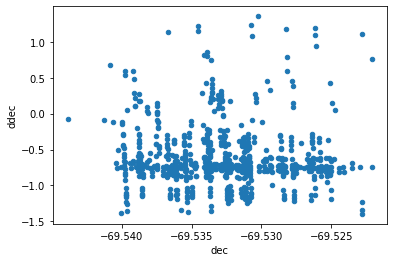

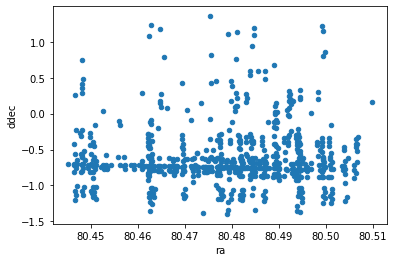

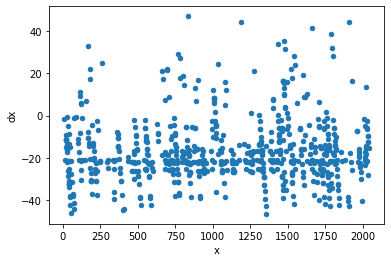

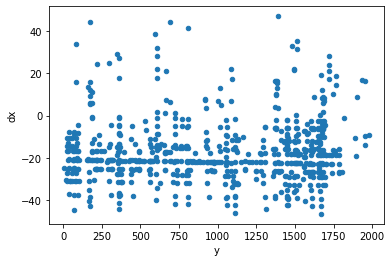

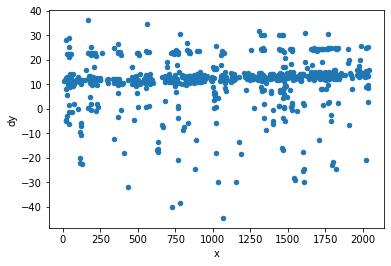

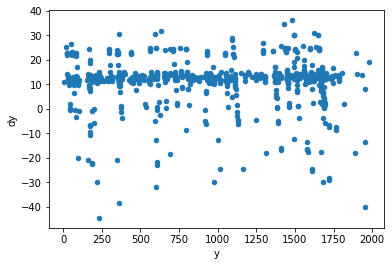

In [247]:
#cal_filename = 'photometry/jw01069001001_02101_00002_nrcalong_cal.phot.txt'
#cal_filename = 'photometry_olddist/jw01069001001_02101_00002_nrcalong_cal.phot.txt'
#cal_filename = 'photometry/jw01069002002_02101_00001_nrcb1_cal.phot.txt'
cal_filename = 'photometryv1/jw01069002002_06101_00001_nrcb4_cal.phot.txt' #F200W works!!!
#cal_filename = 'photometryv1/jw01069002002_04101_00001_nrcb4_cal.phot.txt' #F150W, residual rotation
#cal_filename = 'photometryv1/jw01069002002_04101_00002_nrcb4_cal.phot.txt' #F150W, works!!!
cal_filename = 'photometryv1/jw01069002002_02101_00001_nrcb1_cal.phot.txt' #F070W, bad 20 mas
#cal_filename = 'photometryv1/jw01069002003_02101_00001_nrcb1_cal.phot.txt' #F070W, bad 17 mas
#cal_filename = 'photometryv1/jw01069002004_02101_00001_nrcb1_cal.phot.txt' #F070W, same
#
#cal_filename = 'photometryv1/jw01069002002_02101_00001_nrca1_cal.phot.txt' #F070W, 
cal_filename = 'photometryv1/jw01069002002_04101_00001_nrca4_cal.phot.txt' #F150W, 
#cal_filename = 'photometryv1/jw01069002002_06101_00001_nrca4_cal.phot.txt' #F200W, 
#
#cal_filename = 'photometryv1/jw01069002002_04101_00001_nrcalong_cal.phot.txt' #F277W, 
#cal_filename = 'photometryv1/jw01069002003_04101_00001_nrcalong_cal.phot.txt' #F277W, 8mas
#cal_filename = 'photometryv1/jw01069002002_06101_00001_nrcalong_cal.phot.txt' #F356W, 
#cal_filename = 'photometryv1/jw01069002002_02101_00001_nrcalong_cal.phot.txt' #F444W, 
cal_filename = 'photometryv1/jw01069002003_02101_00001_nrcalong_cal.phot.txt' #F444W, 

#cal_filename = 'photometryv1/jw01069002002_04101_00001_nrcblong_cal.phot.txt' #F277W, 
#cal_filename = 'photometryv1/jw01069002003_04101_00001_nrcalong_cal.phot.txt' #F277W, 8mas
#cal_filename = 'photometryv1/jw01069002002_06101_00001_nrcblong_cal.phot.txt' #F356W, 
#cal_filename = 'photometryv1/jw01069002002_02101_00001_nrcblong_cal.phot.txt' #F444W, 
#cal_filename = 'photometryv1/jw01069002003_02101_00001_nrcblong_cal.phot.txt' #F444W, 

# A5 RND
#cal_filename = 'coron_test/julian/test1_tweakreg/jw01070001001_04101_00008_nrcalong_cal.phot.txt' #Coron
#cal_filename = 'coron_test/julian/test1_tweakreg/jw01070001001_10101_00003_nrcalong_cal.phot.txt'
#cal_filename = 'coron_test/julian/test1_tweakreg/jw01070001001_10101_00004_nrcalong_cal.phot.txt'
#cal_filename = 'coron_test/julian/test1_tweakreg/jw01070001002_04101_00001_nrcalong_cal.phot.txt'
#cal_filename = 'coron_test/julian/test1_tweakreg/jw01070001002_04101_00003_nrcalong_cal.phot.txt'

#A5 BAR
#cal_filename = 'coron_test/julian/test1_tweakreg/jw01070001001_06101_00005_nrcalong_cal.phot.txt'
cal_filename = 'coron_test/julian/test1_tweakreg/jw01070001002_06101_00004_nrcalong_cal.phot.txt'
#cal_filename = 'coron_test/julian/test1_tweakreg/jw01070001002_06101_00001_nrcalong_cal.phot.txt'

# NRCA2_FULL_WEDGE_RND
cal_filename = 'coron_test/julian/test1_tweakreg/NRCA2_FULL_WEDGE_RND/jw01070001002_10101_00003_nrca2_cal.phot.txt'



gaia_align_filename = re.sub('cal.phot.txt$','tweakregstep.phot.txt',cal_filename)
if cal_filename == gaia_align_filename:
    print('ERROR!!!!!!!!!!!!')
phot.load(cal_filename)
ixs_clean = phot.ix_inrange('d2d',None,3*d2d_max)
ixs_clean = phot.ix_inrange('dmag',None,dmag_max,indices=ixs_clean)

print(f'good matched objects: {len(ixs_clean)}')
phot.t.loc[ixs_clean,'dx_idl'] = phot.t.loc[ixs_clean,'cat_x_idl'] - phot.t.loc[ixs_clean,'x_idl']
#phot.t.plot.scatter('x_idl','dx_idl')
phot.t.loc[ixs_clean,'ddec'] = 3600.0*(phot.t.loc[ixs_clean,'cat_dec'] - phot.t.loc[ixs_clean,'dec'])
phot.t.loc[ixs_clean,'dra'] = 3600.0*(phot.t.loc[ixs_clean,'cat_ra'] - phot.t.loc[ixs_clean,'ra'])*np.cos(np.deg2rad(phot.t.loc[ixs_clean,'dec']))
phot.t.plot.scatter('dec','ddec')
phot.t.plot.scatter('ra','ddec')
#phot.write(columns=['cat_dec','dec'])
phot.t.loc[ixs_clean,'dx'] = phot.t.loc[ixs_clean,'cat_x'] - phot.t.loc[ixs_clean,'x']
phot.t.plot.scatter('x','dx')
phot.t.plot.scatter('y','dx')

phot.t.loc[ixs_clean,'dy'] = phot.t.loc[ixs_clean,'cat_y'] - phot.t.loc[ixs_clean,'y']
phot.t.plot.scatter('x','dy')
phot.t.plot.scatter('y','dy')


coron_test/julian/test1_tweakreg/NRCA2_FULL_WEDGE_RND/jw01070001002_10101_00003_nrca2_tweakregstep.phot.txt
good matched objects: 693


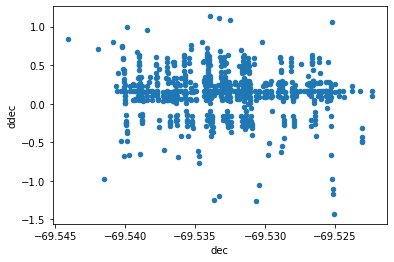

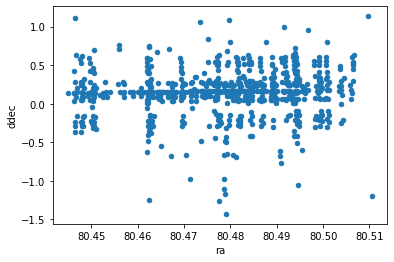

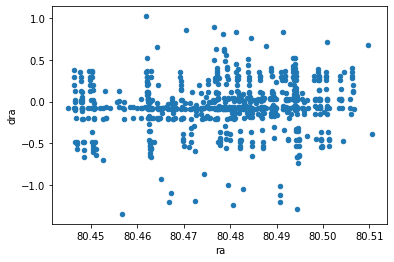

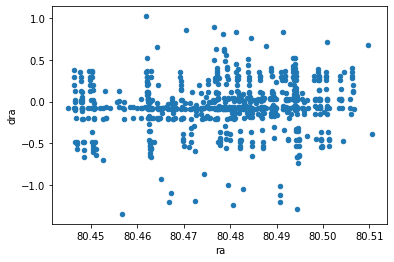

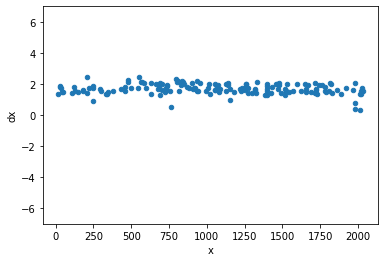

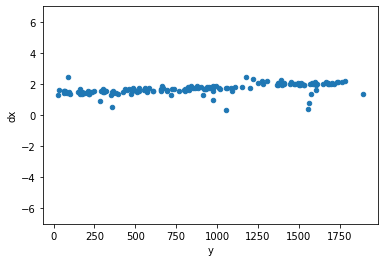

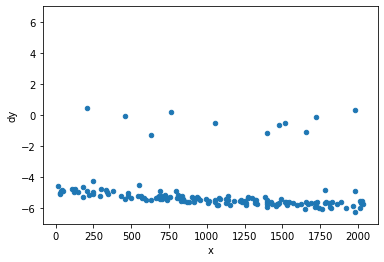

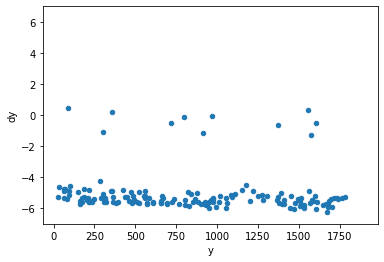

In [252]:
phot_gaia = pdastrostatsclass()
phot_gaia.load(gaia_align_filename)
print(gaia_align_filename)
ixs_clean_gaia = phot_gaia.ix_inrange('d2d',None,3*d2d_max)
ixs_clean_gaia = phot_gaia.ix_inrange('dmag',None,dmag_max,indices=ixs_clean_gaia)

print(f'good matched objects: {len(ixs_clean_gaia)}')
phot_gaia.t.loc[ixs_clean_gaia,'dx_idl'] = phot_gaia.t.loc[ixs_clean_gaia,'cat_x_idl'] - phot_gaia.t.loc[ixs_clean_gaia,'x_idl']
#phot_gaia.t.plot.scatter('x_idl','dx_idl')
phot_gaia.t.loc[ixs_clean_gaia,'ddec'] = 3600.0*(phot_gaia.t.loc[ixs_clean_gaia,'cat_dec'] - phot_gaia.t.loc[ixs_clean_gaia,'dec'])
phot_gaia.t.loc[ixs_clean_gaia,'dra'] = 3600.0*(phot_gaia.t.loc[ixs_clean_gaia,'cat_ra'] - phot_gaia.t.loc[ixs_clean_gaia,'ra'])*np.cos(np.deg2rad(phot_gaia.t.loc[ixs_clean_gaia,'dec']))
phot_gaia.t.plot.scatter('dec','ddec')
phot_gaia.t.plot.scatter('ra','ddec')
phot_gaia.t.plot.scatter('ra','dra')
phot_gaia.t.plot.scatter('ra','dra')

phot_gaia.t.loc[ixs_clean_gaia,'dx'] = phot_gaia.t.loc[ixs_clean_gaia,'cat_x'] - phot_gaia.t.loc[ixs_clean_gaia,'x']
phot_gaia.t.loc[ixs_clean_gaia,'dy'] = phot_gaia.t.loc[ixs_clean_gaia,'cat_y'] - phot_gaia.t.loc[ixs_clean_gaia,'y']
if 1==1:
    ixs_clean4average = phot_gaia.ix_inrange('dx',0,3,indices=ixs_clean_gaia)
    phot_gaia.t.loc[ixs_clean4average].plot.scatter('x','dx',ylim=(-7,7))
    phot_gaia.t.loc[ixs_clean4average].plot.scatter('y','dx',ylim=(-7,7))

    phot_gaia.t.loc[ixs_clean4average].plot.scatter('x','dy',ylim=(-7,7))
    phot_gaia.t.loc[ixs_clean4average].plot.scatter('y','dy',ylim=(-7,7))
else:
    phot_gaia.t.plot.scatter('x','dx',ylim=(-7,7))
    phot_gaia.t.plot.scatter('y','dx',ylim=(-7,7))

    phot_gaia.t.plot.scatter('x','dy',ylim=(-7,7))
    phot_gaia.t.plot.scatter('y','dy',ylim=(-7,7))


In [250]:
print('\n####################\n### dx')
ixs_clean4average = phot_gaia.ix_inrange('dx',0,3,indices=ixs_clean_gaia)
phot_gaia.calcaverage_sigmacutloop('dx',verbose=3,indices=ixs_clean4average,percentile_cut_firstiteration=80)
print(phot_gaia.statstring())
print('\n####################\n### dy')
phot_gaia.calcaverage_sigmacutloop('dy',verbose=3,indices=ixs_clean4average)
print(phot_gaia.statstring())
#phot_gaia.t['test_ddec'] = 3600.0*(phot_gaia.t['dec']-phot.t['dec'])
#phot_gaia.t.plot.scatter('dec','test_ddec')
#print(phot_gaia.t['test_ddec'])



####################
### dx
Keeping 158 out of 158, skippin 0 because of null values in columns dx
median: 1.679275
80.000000 percentile cut: max residual for cut: 0.368543
median: 1.659121
i:00 mean:1.659121(0.017972) stdev:0.200932(0.012658) X2norm:1.00 Nchanged:0 Ngood:126 Nclip:32

mean: 1.722438
i:01 mean:1.722438(0.020426) stdev:0.248497(0.014395) X2norm:1.00 Nchanged:23 Ngood:149 Nclip:9

mean: 1.730859
i:02 mean:1.730859(0.021884) stdev:0.269808(0.015424) X2norm:1.00 Nchanged:4 Ngood:153 Nclip:5

mean: 1.730859
i:03 mean:1.730859(0.021884) stdev:0.269808(0.015424) X2norm:1.00 Nchanged:0 Ngood:153 Nclip:5
i:03 mean:1.730859(0.021884) stdev:0.269808(0.015424) X2norm:1.00 Nchanged:0 Ngood:153 Nclip:5

####################
### dy
Keeping 158 out of 158, skippin 0 because of null values in columns dy
median: -5.402898
i:00 mean:-5.402898(0.304986) stdev:3.821459(0.214974) X2norm:1.00 Nchanged:0 Ngood:158 Nclip:0

mean: -5.063220
i:01 mean:-5.063220(0.107555) stdev:1.339050(0.075809

In [12]:
from astropy.io import fits
import sys
from astropy.table import Table
from astropy.utils.diff import report_diff_values
import asdf

cal_newdist = fits.open('v1/jw01144030001_02101_00004_nrcblong_cal.fits')
tnew=Table.read(cal_newdist['ASDF'])
cal_olddist = fits.open('v2_nonewdist/jw01144030001_02101_00004_nrcblong_cal.fits')
told=Table.read(cal_olddist['ASDF'])
print('------------------------')
identical = report_diff_values(told['ASDF_METADATA'][0][:],tnew['ASDF_METADATA'][0][:], fileobj=sys.stdout)




------------------------
  Different array shapes:
    a> (23955,)
     ?      ^
    b> (23958,)
     ?      ^


In [33]:
phot_gaia.write()

 aper_sum_4.6px  annulus_median_4.6px  aper_bkg_4.6px  aper_sum_bkgsub_4.6px  flux_err_4.6px        mag     dmag           x           y  sharpness  roundness1  roundness2        ra        dec      x_idl      y_idl    cat_ra    cat_dec       cat_x       cat_y  cat_x_idl  cat_y_idl  gaia_mag  cat_index      d2d    dx_idl    ddec       dra        dx        dy
     329.686965              0.958346       63.817965             265.869001        6.346569  -6.061669 0.025924  925.535444    7.719832   0.621746   -0.350133   -0.070147 80.382140 -69.517934  -6.316152 -64.615565 80.380958 -69.518540  885.505462   18.605439  -8.858262 -63.900308    18.918     6289.0 2.640808       NaN     NaN       NaN       NaN       NaN
     137.848916              0.779333       51.897157              85.951759        5.073020  -4.835637 0.064098 1776.392604    7.882103   0.608176   -0.168740   -0.066263 80.415044 -69.508219  47.924274 -64.767171 80.413573 -69.508668 1737.966558    8.593527  45.466014 -64.72146

0